# Train OCR text Detector quick example

For train datasets please download last version of ocr datasets [https://nomeroff.net.ua/datasets/](https://nomeroff.net.ua/datasets/). Unpack archive and rename to **./datasets/ocr** .
For examle
```bash
cd ./datasets/ocr
wget https://nomeroff.net.ua/datasets/autoriaNumberplateOcrGe-2019-07-06.zip
unzip autoriaNumberplateOcrGe-2019-07-06.zip
mv autoriaNumberplateOcrGe-2019-07-06.zip ge
```
or use your own dataset.

In [2]:
import os
import sys
import warnings
warnings.filterwarnings('ignore')

# change this property
NOMEROFF_NET_DIR = os.path.abspath('../')

DATASET_NAME = "ge"
VERSION = "2020_08_26_tensorflow_v2"
PATH_TO_DATASET = os.path.join(NOMEROFF_NET_DIR, "datasets/ocr/", DATASET_NAME)
RESULT_MODEL_PATH = os.path.join(NOMEROFF_NET_DIR, "models/", 'anpr_ocr_{}_{}.h5'.format(DATASET_NAME, VERSION))

sys.path.append(NOMEROFF_NET_DIR)

from NomeroffNet.Base import OCR

In [3]:
class ge(OCR):
    def __init__(self):
        OCR.__init__(self)
        # only for usage model
        # in train generate automaticly
        self.letters = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]
        
        self.EPOCHS = 3

GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'N', 'G', 'X', 'L', '2', 'C', 'K', 'Q', 'D', 'E', 'A', 'P', 'U', 'Z', 'V', 'H', 'J', '1', 'T', 'S', 'M', 'R', 'F', '0', '3', '7', '9', '8', 'B', 'Y', '4', '6', 'I', 'W', '5'}
Letters val  {'N', 'G', 'X', 'L', '2', 'C', 'K', 'Q', 'D', 'E', 'A', 'P', 'U', 'V', 'Z', 'H', 'J', '1', 'T', 'S', 'M', 'R', 'F', '0', '3', '9', '7', '8', 'B', 'Y', '4', '6', 'I', 'W', '5'}
Letters test  {'N', 'G', 'X', 'L', '2', 'C', 'K', 'Q', 'D', 'E', 'A', 'P', 'Z', 'V', 'U', 'H', 'J', '1', 'T', 'S', 'M', 'R', 'F', '0', '3', '9', '7', '8', 'B', 'Y', '6', '4', 'I', 'W', '5'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


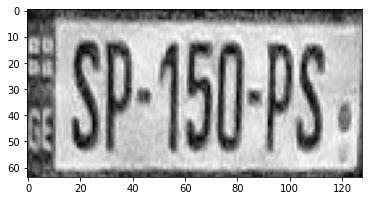

2) the_labels (plate number): SP150PS is encoded as [27, 24, 1, 5, 0, 24, 27]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED


In [5]:
ocrTextDetector = ge()
model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=0)

In [8]:
model = ocrTextDetector.train(is_random=1)


START TRAINING
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ge (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ge[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
__________________________________________________________________________________________________
conv2 (Conv2D)                  (None, 64, 32, 16)   2320        max1[0][0]                       
_______________________________________________________________________

KeyboardInterrupt: 

In [6]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 XHX177
True: 			 XHX172

Predicted: 		 F947FK
True: 			 KF947FK

Predicted: 		 QFQ18
True: 			 QFQ181

Predicted: 		 HF084XX
True: 			 FF384XX

Predicted: 		 GA2049
True: 			 GGA2049

Predicted: 		 IGG1511I
True: 			 GG1511

Predicted: 		 TN635NT
True: 			 TM635NT

Predicted: 		 C6042A
True: 			 VW046WW

Predicted: 		 HF007FH
True: 			 HF007GH

Predicted: 		 CC634WW
True: 			 CC634WV

Predicted: 		 ZN880NZ
True: 			 ZN880WZ

Predicted: 		 AA49664
True: 			 AA435CA

Predicted: 		 DC599A
True: 			 DZ399ZD

Predicted: 		 VV700VA
True: 			 VV702VA

Predicted: 		 IBT177
True: 			 TBT177

Predicted: 		 IUUK873
True: 			 NUK873

Predicted: 		 QJQQ043
True: 			 QJQ043

Predicted: 		 QZ538G0
True: 			 0ZS3800

Predicted: 		 SD001IT
True: 			 S0001IT

Predicted: 		 I700LS
True: 			 MM700LS

Predicted: 		 LG1505GL
True: 			 LG150GL

Predicted: 		 BB243BD
True: 			 BB243BQ

Predicted: 		 G811GG
True: 			 CC811GG

Predicted: 		 IK001KA
True: 			 BK80R0

Predicted: 		 G7651


In [7]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_ge_2020_08_26_tensorflow_v2.h5


GET ALPHABET
Max plate length in "val": 7
Max plate length in "train": 7
Max plate length in "test": 7
Letters train  {'N', 'G', 'X', 'L', '2', 'C', 'K', 'Q', 'D', 'E', 'A', 'P', 'U', 'Z', 'V', 'H', 'J', '1', 'T', 'S', 'M', 'R', 'F', '0', '3', '7', '9', '8', 'B', 'Y', '4', '6', 'I', 'W', '5'}
Letters val  {'N', 'G', 'X', 'L', '2', 'C', 'K', 'Q', 'D', 'E', 'A', 'P', 'U', 'V', 'Z', 'H', 'J', '1', 'T', 'S', 'M', 'R', 'F', '0', '3', '9', '7', '8', 'B', 'Y', '4', '6', 'I', 'W', '5'}
Letters test  {'N', 'G', 'X', 'L', '2', 'C', 'K', 'Q', 'D', 'E', 'A', 'P', 'Z', 'V', 'U', 'H', 'J', '1', 'T', 'S', 'M', 'R', 'F', '0', '3', '9', '7', '8', 'B', 'Y', '6', '4', 'I', 'W', '5'}
Max plate length in train, test and val do match
Letters in train, val and test do match
Letters: 0 1 2 3 4 5 6 7 8 9 A B C D E F G H I J K L M N P Q R S T U V W X Y Z

EXPLAIN DATA TRANSFORMATIONS
Text generator output (data which will be fed into the neutral network):
1) the_input (image)


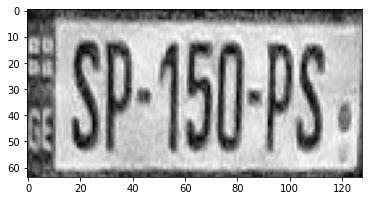

2) the_labels (plate number): SP150PS is encoded as [27, 24, 1, 5, 0, 24, 27]
3) input_length (width of image that is fed to the loss function): 30 == 128 / 4 - 2
4) label_length (length of plate number): 7
START BUILD DATA
DATA PREPARED

START TRAINING
Model: "functional_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
the_input_ge (InputLayer)       [(None, 128, 64, 1)] 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 128, 64, 16)  160         the_input_ge[0][0]               
__________________________________________________________________________________________________
max1 (MaxPooling2D)             (None, 64, 32, 16)   0           conv1[0][0]                      
______________________________

In [15]:
# Train with aug
ocrTextDetector = ge()
ocrTextDetector.EPOCHS = 1

model = ocrTextDetector.prepare(PATH_TO_DATASET, use_aug=True)

model = ocrTextDetector.train(load_last_weights=True)

In [16]:
ocrTextDetector.test(verbose=True)


RUN TEST

Predicted: 		 XHX177
True: 			 XHX172

Predicted: 		 F947FK
True: 			 KF947FK

Predicted: 		 AX0040R
True: 			 AX004CR

Predicted: 		 GA2049
True: 			 GGA2049

Predicted: 		 K741WW
True: 			 KK741WW

Predicted: 		 TDM884
True: 			 TDM888

Predicted: 		 IGG1511I
True: 			 GG1511

Predicted: 		 TN635NT
True: 			 TM635NT

Predicted: 		 CGD42A
True: 			 VW046WW

Predicted: 		 HF097FH
True: 			 HF007GH

Predicted: 		 CC634WW
True: 			 CC634WV

Predicted: 		 ZN880NZ
True: 			 ZN880WZ

Predicted: 		 A443565
True: 			 AA435CA

Predicted: 		 DZ399ZU
True: 			 DZ399ZD

Predicted: 		 IHBT177
True: 			 TBT177

Predicted: 		 MMUK873
True: 			 NUK873

Predicted: 		 QJQQ043
True: 			 QJQ043

Predicted: 		 QZ538G0
True: 			 0ZS3800

Predicted: 		 SD001IT
True: 			 S0001IT

Predicted: 		 WI700KLS
True: 			 MM700LS

Predicted: 		 LG1505GL
True: 			 LG150GL

Predicted: 		 GC811GG
True: 			 CC811GG

Predicted: 		 IK001KA
True: 			 BK80R0

Predicted: 		 YX324XX
True: 			 YY324XX

Predicted: 		 V

In [12]:
ocrTextDetector.save(RESULT_MODEL_PATH, verbose=True)

SAVED TO /mnt/storage2/var/www/nomeroff-net/models/anpr_ocr_ge_2020_08_26_tensorflow_v2.h5


In [13]:
from tensorflow.keras.models import Model, load_model
ocrTextDetector.MODEL = load_model(RESULT_MODEL_PATH)